In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

In [2]:
df = pd.read_csv("./Wine_Test_02.csv")

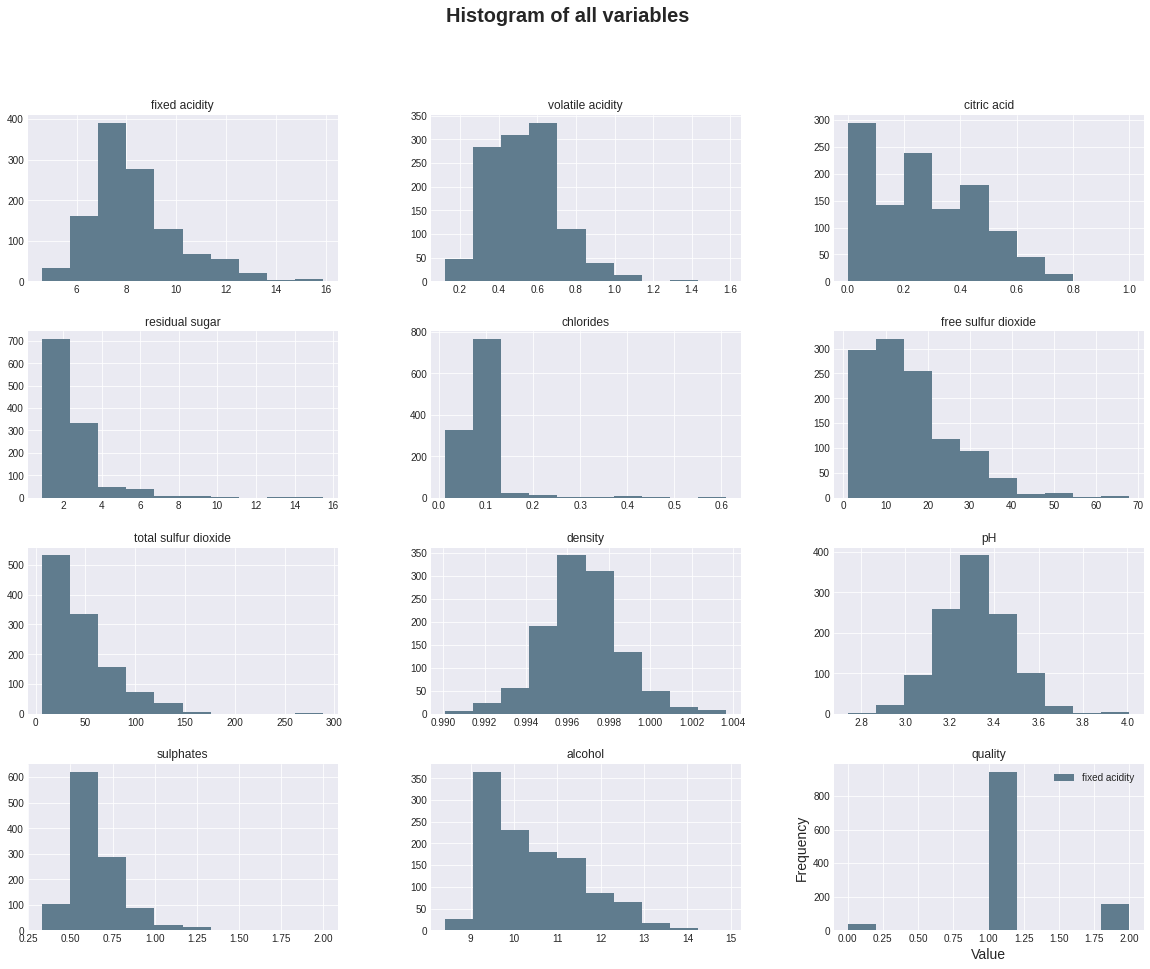

In [3]:
plt.style.use('seaborn-darkgrid')
df.hist(figsize=(20,15), color='#607c8e')
plt.suptitle("Histogram of all variables", fontsize=20, fontweight='bold')
plt.xlabel("Value", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(df.columns, loc='upper right')
plt.show()

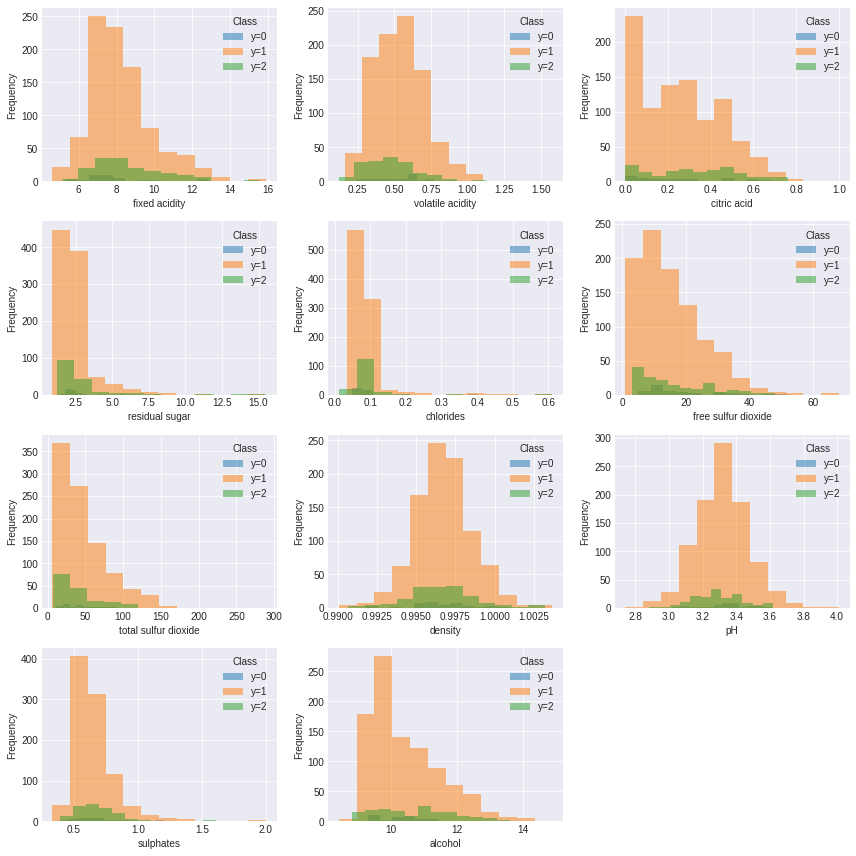

In [4]:
grouped = df.groupby('quality')
num_cols = len(df.columns) - 1
num_rows = num_cols // 3 + (num_cols % 3 > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(12, 3*num_rows))
for i, col in enumerate(df.columns[:-1]):
    row_idx, col_idx = divmod(i, 3)
    for key, group in grouped:
        group[col].hist(alpha=0.5, bins=12, ax=axes[row_idx][col_idx], label=f'y={key}')
    axes[row_idx][col_idx].set_xlabel(col)
    axes[row_idx][col_idx].set_ylabel('Frequency')
    axes[row_idx][col_idx].legend(title='Class')

for i in range(num_cols, num_rows*3):
    fig.delaxes(axes.flat[i])

plt.tight_layout()
plt.show()

In [5]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split

In [6]:
x = df.copy().drop(columns=["quality"])
y = df["quality"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
gpc = GaussianProcessClassifier()

In [9]:
ova_classifier = OneVsRestClassifier(gpc)
ova_classifier.fit(X_train, y_train)
ova_predictions = ova_classifier.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, ova_predictions)
recall = recall_score(y_test, ova_predictions, average="macro")
precision = precision_score(y_test, ova_predictions, average="macro")

In [11]:
print("One Vs All model")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

One Vs All model
Accuracy: 0.7903930131004366
Recall: 0.36752136752136755
Precision: 0.3586426299045599


In [12]:
ovo_classifier = OneVsOneClassifier(gpc)
ovo_classifier.fit(X_train, y_train)
ovo_predictions = ovo_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, ovo_predictions)
recall = recall_score(y_test, ovo_predictions, average="macro")
precision = precision_score(y_test, ovo_predictions, average="macro")

In [14]:
print("One Vs One model")
print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")

One Vs One model
Accuracy: 0.7991266375545851
Recall: 0.3825641025641026
Precision: 0.3747613997879109


In [15]:
cm = confusion_matrix(ovo_predictions, y_test)

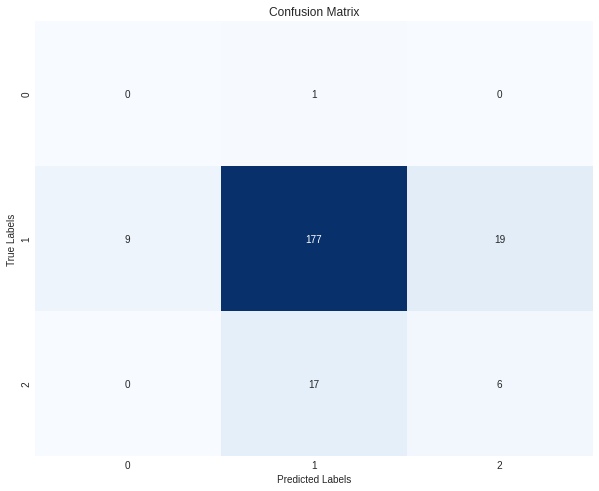

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
